In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from rich import print

In [2]:
# Display Settings
pd.set_option('display.max_columns', None)
%matplotlib inline

print("Libraries imported successfully")

Libraries imported successfully


In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\sridh\Desktop\TelcoCustomerChurn_Project\customer-churn-prediction\data\raw\telco_churn.csv")

# Lets look at the data
print("Shape of the dataset", df.shape)
print('Print first 5 rows')
df.head()

Shape of the dataset (7043, 21)
Print first 5 rows


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check target variable distribution
print("Churn Value Counts:")
print(df['Churn'].value_counts())
print("\nChurn Percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

Churn Value Counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


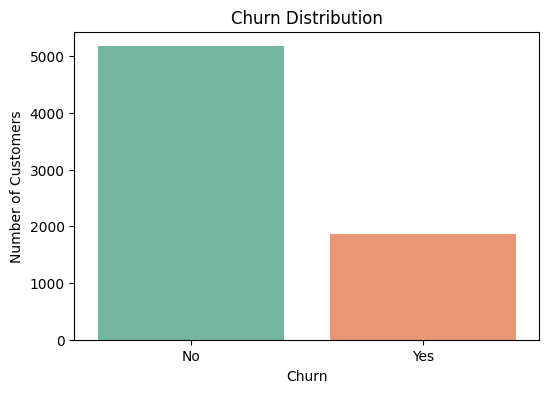

In [6]:
# Visualize churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Set2', hue = 'Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.savefig('../reports/figures/01_churn_distribution.png')
plt.show()

In [7]:
# Check for hidden missing values in TotalCharges
print("Spaces in TotalCharges:", df[df['TotalCharges'] == ' '].shape[0])

Spaces in TotalCharges: 11


In [8]:
# Full missing values check
print("Null values:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())

Null values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Duplicate rows: 0


In [9]:
# Fix TotalCharges - replace spaces with NaN and convert to float
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verify the fix
print("TotalCharges dtype now:", df['TotalCharges'].dtype)
print("Null values in TotalCharges:", df['TotalCharges'].isnull().sum())

TotalCharges dtype now: float64
Null values in TotalCharges: 11


In [10]:
# Check those 11 rows
print(df[df['TotalCharges'].isnull()][['customerID','tenure','MonthlyCharges','TotalCharges']])

      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           NaN
753   3115-CZMZD       0           20.25           NaN
936   5709-LVOEQ       0           80.85           NaN
1082  4367-NUYAO       0           25.75           NaN
1340  1371-DWPAZ       0           56.05           NaN
3331  7644-OMVMY       0           19.85           NaN
3826  3213-VVOLG       0           25.35           NaN
4380  2520-SGTTA       0           20.00           NaN
5218  2923-ARZLG       0           19.70           NaN
6670  4075-WKNIU       0           73.35           NaN
6754  2775-SEFEE       0           61.90           NaN


In [11]:
# Fill TotalCharges nulls with 0 
# because these are new customers with tenure=0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Verify no more nulls
print("Null values remaining:", df['TotalCharges'].isnull().sum())
print("TotalCharges dtype:", df['TotalCharges'].dtype)

Null values remaining: 0
TotalCharges dtype: float64


In [12]:
# Check categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")
    print()

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']



In [13]:
# Statistical summary of numerical columns
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [14]:
# Check tenure distribution
print(df['tenure'].describe())
print("\nHow many customers have tenure > 60 months:")
print(df[df['tenure'] > 60].shape[0])

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

How many customers have tenure > 60 months:
1407


In [15]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")
    print()

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']



In [18]:
# To replace no internet Service and No Phone service to no 
cols_to_fix = ["StreamingTV", "TechSupport", "DeviceProtection","OnlineBackup","OnlineSecurity",  "MultipleLines"]

for col in cols_to_fix:
    df[col] = df[col].replace({'No phone service' : "No",
                               'No internet service': "No",
                               })
    
for col in cols_to_fix:
    print(df[col].value_counts())

StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64


In [19]:
# Check customerID - should be unique for every row
print("Total rows:", df.shape[0])
print("Unique customerIDs:", df['customerID'].nunique())

# Drop customerID as it's not useful for prediction
df = df.drop('customerID', axis=1)
print("\nCustomerID dropped. New shape:", df.shape)

Total rows: 7043
Unique customerIDs: 7043

CustomerID dropped. New shape: (7043, 20)


In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# Save cleaned data to processed folder
df.to_csv('../data/processed/telco_churn_cleaned.csv', index=False)
print("Cleaned data saved successfully!")
print("Shape:", df.shape)

Cleaned data saved successfully!
Shape: (7043, 20)
